# Ecuaciones Diferenciales Ordinarias
### Tarea: Métodos numéricos de aproximación a la curva solución de problemas de valor inicial


### Nombre y Apellidos:
- Anabel Benítez González
- Leydis Laura Hernández Martínez
- Raudel Alejandro Gómez Molina

Grupo: C-211


## Introducción
El presente informe documenta la solución computarizada de los ejercicios:

- 20, Sección 2.4, página 122 
- 26, Sección 2.5, página 132
- 20, Sección 2.6, página 142

del libro principal de la asignatura. El código fuente se ha escrito en el lenguaje Python. Para cada ejercicio se elaboró una tabla que recoge las aproximaciones de la curva solución para cada problema de valor inicial, teniendo en cuenta los tamaños de paso especificados. También se construyeron gráficas para cada caso, utilizando la librería matplotlib de Python. A lo largo de los ejercicios, las primas representan derivadas con respecto a x.

Para la aproximación de las funciones se itera por el intervalo especificado en cada ejercicio y con estos valores se construye la gráfica aproximada de la función. Para comparar la exactitud de las aproximaciones con respecto al tamaño de paso, se escogen la cantidad de puntos arbitrarios especificados en cada ejercicio de manera que coincidan para todos los tamaños de paso.   


## Implementación de los métodos
</br>

In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate


def method_euler(f, y0: float, xl: float, xr: int, h: float, approximate: int) -> tuple:
    y: list = [y0]
    x: list = [xl]

    while (x[-1] <= xr):
        y.append(round(y[-1]+h*f(x[-1], y[-1]), approximate))
        x.append(round(x[-1]+h, approximate))

    return x, y


def best_method_euler(f, y0: float, xl: float, xr: float, h: float, approximate: int) -> tuple:
    y: list = [y0]
    x: list = [xl]

    while (x[-1] <= xr):
        k1: float = f(x[-1], y[-1])
        x.append(round(h+x[-1], approximate))

        k2: float = f(x[-1], y[-1]+h*k1)
        y.append(round(y[-1]+h*0.5*(k1+k2), approximate))

    return x, y


def method_runge_kutta(f, y0: float, xl: float, xr: float, h: float, approximate: int) -> tuple:
    y: list = [y0]
    x: list = [xl]

    while (x[-1] <= xr):
        k1: float = f(x[-1], y[-1])
        k2: float = f(x[-1]+h/2, y[-1]+h*k1/2)
        k3: float = f(x[-1]+h/2, y[-1]+h*k2/2)

        x.append(round(x[-1]+h, approximate))
        k4: float = f(x[-1], y[-1]+h*k3)
        y.append(round(y[-1]+h/6*(k1+2*k2+2*k3+k4), approximate))

    return x, y


def table(n: tuple, points: int):
    item: int = int(len(n[0])/points)
    if points == 5:
        print(tabulate([['x']+[n[0][i*item] for i in range(5)],
              ['y']+[n[1][i*item] for i in range(5)]]))
    else:
        print(tabulate([['x']+[n[0][i*item] for i in range(5)], ['y']+[n[1][i*item] for i in range(5)],
              ['x']+[n[0][(5+i)*item] for i in range(5)], ['y']+[n[1][(5+i)*item] for i in range(5)]]))


</br>
</br>

## Método de Euler
Ejer 20 pág 122

Para el siguiente problema de valor inicial, utilice el método de Euler con tamaños de paso 
h = 0.1, h = 0.02, h = 0.004 y h = 0.0008, para aproximar, con 4 cifras decimales, los valores de la solución en 10 puntos igualmente espaciados del intervalo dado.

$$y'=x+\sqrt[3]{y},\quad y(0)=-1;\quad 0\leq x\leq 2$$

</br>


### Tamaño de paso: $h=0.1$

</br>

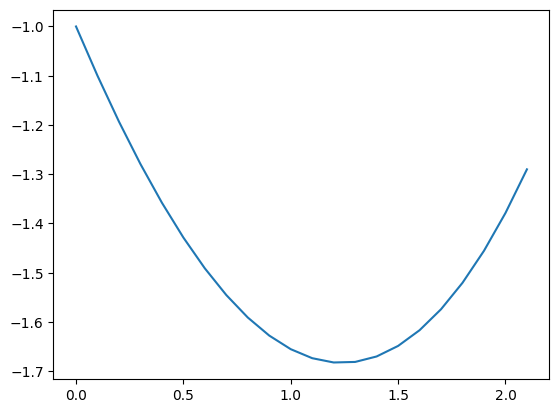

-  -------  -------  -------  -------  -------
x   0        0.2      0.4      0.6      0.8
y  -1       -1.1932  -1.3579  -1.4912  -1.591
x   1        1.2      1.4      1.6      1.8
y  -1.6553  -1.6823  -1.6701  -1.6168  -1.5205
-  -------  -------  -------  -------  -------


In [2]:
#h=0.1
ej20_122_01 = method_euler(lambda x, y: x + (1 if y > 0 else -1)
                        * abs(y)**(1/3), -1, 0, 2, 0.1, 4)

plt.plot(ej20_122_01[0], ej20_122_01[1])
plt.show()

table(ej20_122_01,10)

</br>

### Tamaño de paso: $h=0.02$

</br>

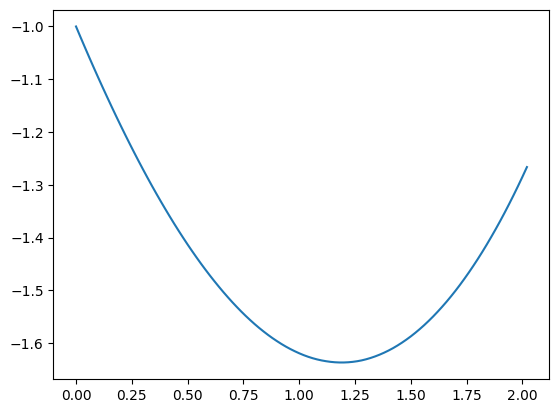

-  ------  -------  -------  -------  -------
x   0       0.2      0.4      0.6      0.8
y  -1      -1.1876  -1.3458  -1.4718  -1.5636
x   1       1.2      1.4      1.6      1.8
y  -1.619  -1.6364  -1.6138  -1.5492  -1.4404
-  ------  -------  -------  -------  -------


In [3]:
# h=0.02
ej20_122_002 = method_euler(lambda x, y: x + (1 if y > 0 else -1)
                        * abs(y)**(1/3), -1, 0, 2, 0.02, 4)

plt.plot(ej20_122_002[0], ej20_122_002[1])
plt.show()

table(ej20_122_002,10)

</br>

### Tamaño de paso: $h=0.004$

</br>

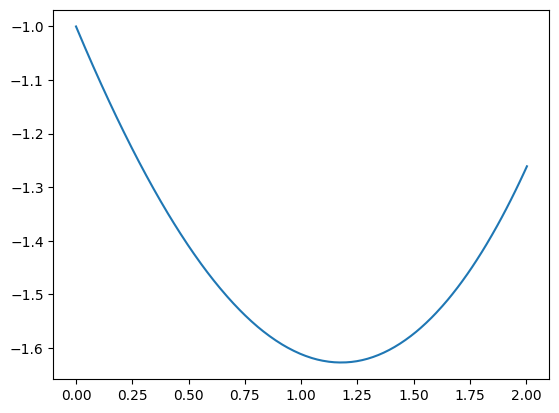

-  -------  -------  -------  -------  -------
x   0        0.2      0.4      0.6      0.8
y  -1       -1.1864  -1.3432  -1.4678  -1.558
x   1        1.2      1.4      1.6      1.8
y  -1.6116  -1.627   -1.602   -1.5349  -1.4234
-  -------  -------  -------  -------  -------


In [17]:
# h=0.004
ej20_122_0004 = method_euler(lambda x, y: x + (1 if y > 0 else -1)
                             * abs(y)**(1/3), -1, 0, 2, 0.004, 4)

plt.plot(ej20_122_0004[0], ej20_122_0004[1])
plt.show()

table(ej20_122_0004,10)


</br>

### Tamaño de paso: $h=0.0008$

</br>

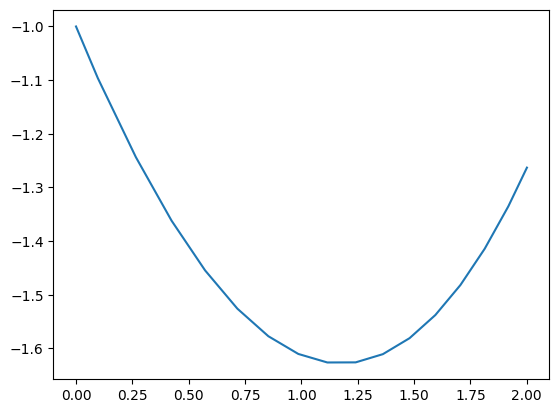

-  -------  -------  -------  -------  -------
x   0        0.2      0.4      0.6      0.8
y  -1       -1.1866  -1.3444  -1.4683  -1.5575
x   1        1.2      1.4      1.6      1.8
y  -1.6121  -1.6263  -1.6012  -1.5351  -1.423
-  -------  -------  -------  -------  -------


In [16]:
# h=0.0008
ej20_122_00008 = method_euler(lambda x, y: x + (1 if y > 0 else -1)
                              * abs(y)**(1/3), -1, 0, 2, 0.0008, 4)

plt.plot(ej20_122_00008[0], ej20_122_00008[1])
plt.show()

table(ej20_122_00008,10)


## Método de Euler mejorado
Ejer 26 pág 132

Suponga que en un pequeño bosque la población de venados $P(t)$ inicialmente es de 25 individuos y satisface la ecuación logística

$$\frac{dP}{dt}=0.0225P-0.0003P^2$$

(con t en meses). Utilice el método de Euler mejorado con el fin de aproximar la solución para 10 años, primero con un tamaño de paso h = 1 y después con h = 0.5, redondeando los valores aproximados de P a 3 cifras decimales, ¿qué porcentaje de la población límite de 75 venados se obtiene después de 5 años? ¿Después de 10 años?



</br>

### Tamaño de paso: $h=1$

</br>

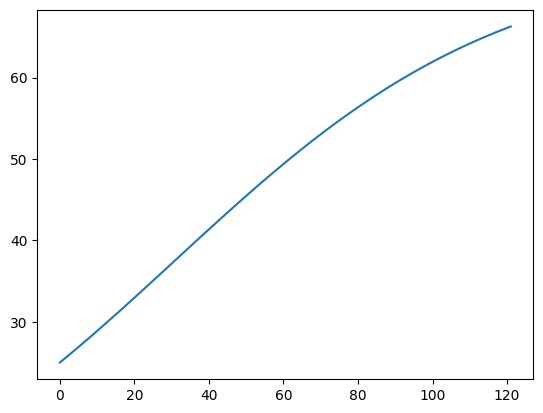

-  ------  ------  ------  ------  -------
x   0      12      24      36       48
y  25      29.682  34.633  39.688   44.664
x  60      72      84      96      108
y  49.392  53.733  57.597  60.943   63.771
-  ------  ------  ------  ------  -------


In [15]:
# h=1
ej26_132_1 = best_method_euler(
    lambda x, y: 0.0225*y - 0.0003*y**2, 25, 0, 120, 1, 3)

plt.plot(ej26_132_1[0], ej26_132_1[1])
plt.show()

table(ej26_132_1,10)


</br>

### Tamaño de paso: $h=0.5$

</br>

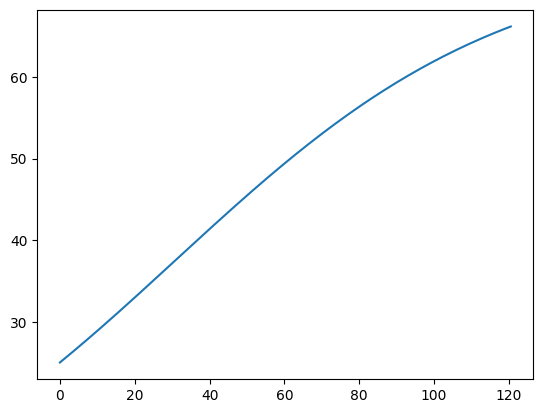

-  ------  ------  ------  ------  -------
x   0      12      24      36       48
y  25      29.684  34.635  39.691   44.666
x  60      72      84      96      108
y  49.394  53.735  57.6    60.946   63.774
-  ------  ------  ------  ------  -------


In [14]:
# h=0.5
ej26_132_05 = best_method_euler(
    lambda x, y: 0.0225*y - 0.0003*y**2, 25, 0, 120, 0.5, 3)

plt.plot(ej26_132_05[0], ej26_132_05[1])
plt.show()

table(ej26_132_05,10)

Después de 5 años se obtiene 65 porciento aproximadamente de la población límite de 75 venados.
Después de 10 años se obtiene 88 porciento aproximadamente de la población límite de 75 venados.
</br>
</br>

## Método de Runge-Kutta
Ejer 20 pág 142

Para el siguiente problema de valor inicial utilice el método de Runge-Kutta con tamaños de paso h = 0.2, h = 0.1, h = 0.05 y h = 0.025 para aproximar a 6 cifras decimales los valores de la solución en 5 puntos igualmente espaciados del intervalo dado.

$$y'=x+\sqrt[3]{y},\quad y(0)=-1;\quad 0\leq x\leq 2$$

### Tamaño de paso: $h=0.2$

</br>

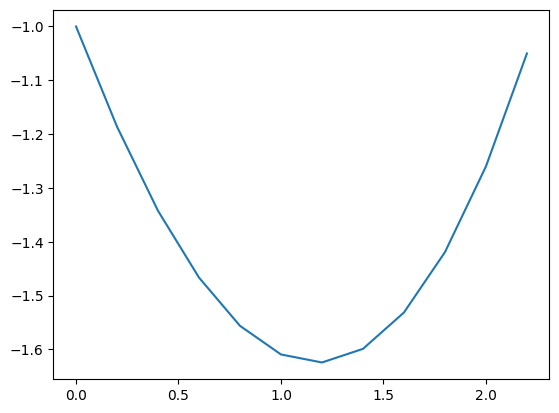

-  --  -------  -------  -------  -------
x   0   0.4      0.8      1.2      1.6
y  -1  -1.3425  -1.5563  -1.6244  -1.5315
-  --  -------  -------  -------  -------


In [13]:
# h=0.2
ej20_142_02 = method_runge_kutta(lambda x, y: x + (1 if y > 0 else -1)
                        * abs(y)**(1/3), -1, 0, 2, 0.2, 4)

plt.plot(ej20_142_02[0], ej20_142_02[1])
plt.show()

table(ej20_142_02,5)

</br>

### Tamaño de paso: $h=0.01$

</br>

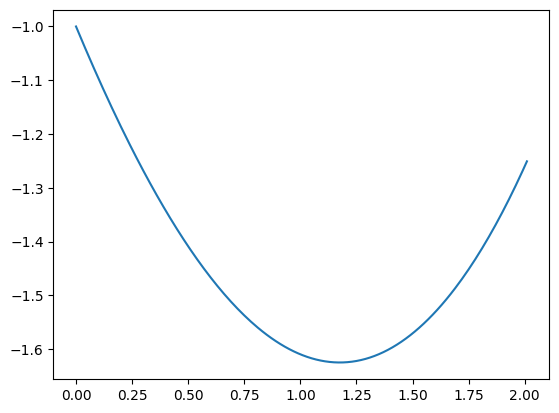

-  --  --------  --------  --------  --------
x   0   0.4       0.8       1.2       1.6
y  -1  -1.34249  -1.55627  -1.62441  -1.53145
-  --  --------  --------  --------  --------


In [12]:
# h=0.01
ej20_142_001 = method_runge_kutta(lambda x, y: x + (1 if y > 0 else -1)
                        * abs(y)**(1/3), -1, 0, 2, 0.01, 6)

plt.plot(ej20_142_001[0], ej20_142_001[1])
plt.show()

table(ej20_142_001,5)

</br>

### Tamaño de paso: $h=0.05$

</br>

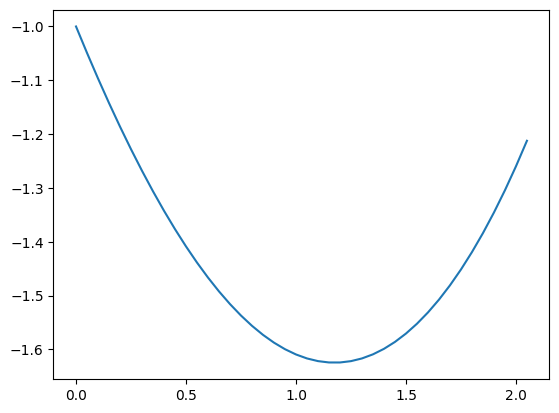

-  --  --------  --------  --------  --------
x   0   0.4       0.8       1.2       1.6
y  -1  -1.34249  -1.55627  -1.62441  -1.53146
-  --  --------  --------  --------  --------


In [10]:
# h=0.05
ej20_142_005 = method_runge_kutta(lambda x, y: x + (1 if y > 0 else -1)
                        * abs(y)**(1/3), -1, 0, 2, 0.05, 6)

plt.plot(ej20_142_005[0], ej20_142_005[1])
plt.show()

table(ej20_142_005,5)

</br>

### Tamaño de paso: $h=0.025$

</br>

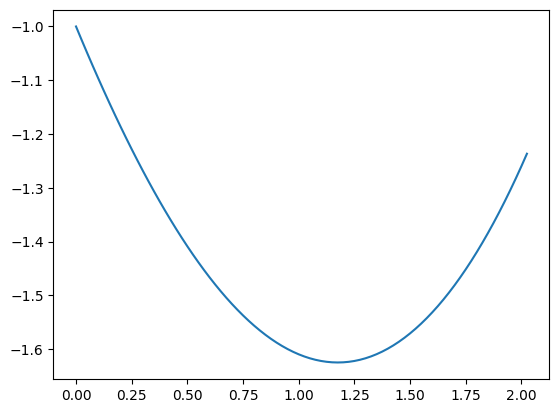

-  --  --------  --------  --------  --------
x   0   0.4       0.8       1.2       1.6
y  -1  -1.34249  -1.55627  -1.62441  -1.53146
-  --  --------  --------  --------  --------


In [11]:
# #h=0.025
ej20_142_0025 = method_runge_kutta(lambda x, y: x + (1 if y > 0 else -1)
                        * abs(y)**(1/3), -1, 0, 2, 0.025, 6)

plt.plot(ej20_142_0025[0], ej20_142_0025[1])
plt.show()

table(ej20_142_0025,5)